# Regression Analysis

### Exercise 1:

What linear regression equation best predicts statistics performance for the students assuming we have following data? If a student made an 80 on the test, what grade would we expect him to make in statistics? How well does the regression equation fit the data?
Student
test_score
statistics_grade

In [1]:
import pandas as pd
from scipy import stats

dataset = pd.read_csv("Dataset student_score.csv")

test_scores = dataset['Xi']
statistics_scores = dataset['Yi']

result = stats.linregress(test_scores, statistics_scores)
print("Regression Equation: y = ", result.slope, "x +", result.intercept)

prediction = (result.slope * 80) + result.intercept
print("The prediction is", prediction)
print("In the real data, when the test score was 80, the statistics score was 70. The predicted value for our equation was 78 so it is not 100% accurate")



Regression Equation: y =  0.6438356164383562 x + 26.78082191780822
The prediction is 78.2876712328767
In the real data, when the test score was 80, the statistics score was 70. The predicted value for our equation was 78 so it is not 100% accurate


### Exercise 2:

Plot linear regression line for the data given in Exercise-1 using matplotlib library

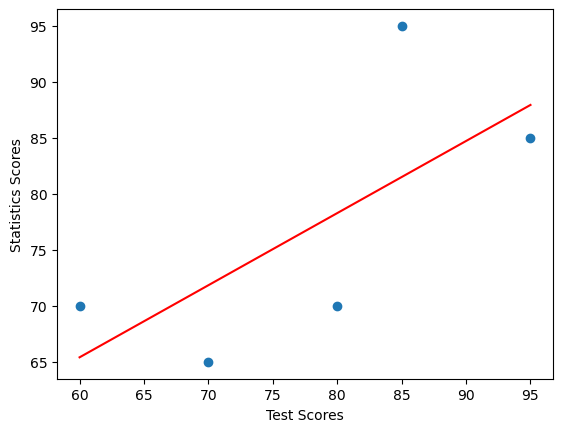

In [6]:
import matplotlib.pyplot as plt

plt.scatter(test_scores, statistics_scores)
regression_line = (result.slope * test_scores) + result.intercept
plt.plot(test_scores, regression_line, color = 'red')
plt.xlabel('Test Scores')
plt.ylabel("Statistics Scores")
plt.show()



### Exercise 3:

Measure the R-squared value, goodness-of-fit for Exercise-1 linear regression model

In [22]:
r_squared = result.rvalue * result.rvalue
print("The R-Squared value is:", r_squared)

The R-Squared value is: 0.4803218090889323


### Exercise 4:

Consider the following data:
Y: [16,4,1,9,1,25,16,4,0,9,25]
X: [-4,-2,1,3,-1,-5,4,2,0,-3,5]
3.1) Visualize the scatter plot for the above data using matplotlib library
3.2) What type of regression model is it?

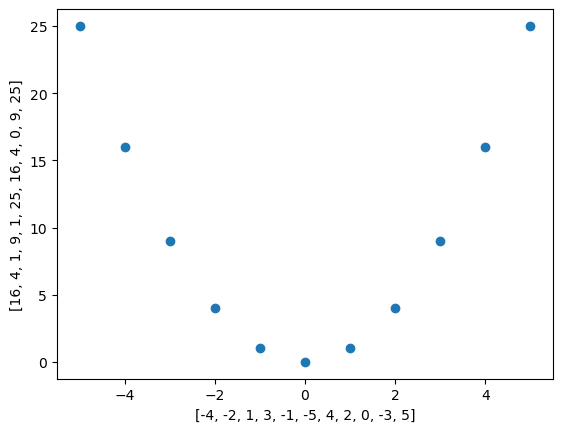

This is a polynomial regression, specifically a quadratic regression.


In [7]:
import matplotlib.pyplot as plt

x = [-4,-2,1,3,-1,-5,4,2,0,-3,5]
y = [16,4,1,9,1,25,16,4,0,9,25]

# 3.1
plt.scatter(x, y)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

# 3.2
print("This is a polynomial regression, specifically a quadratic regression.")


### Exercise 5.1:

1.In this part you will use Python to analyze the heart disease data set (the link and explanation is included here) by training and building a model with regression analysis. Test your model and discuss the result of your test with performance metrics. Make sure you separate training set and testing data properly. Then analyse the input data and explain which of them have more effects on output and modify your models by eliminating non significant variables. (5 marks)
Heart Disease Dataset: Here, is the link for heart disease dataset of patients. http://archive.ics.uci.edu/ml/datasets/Heart+Disease After going to this link you will find two folders: One: Data Folder and two: Dataset description. Data folder that has the dataset. It is better to use processed cleveland data. In the dataset description folder, you will find the description about the columns’ names referring to the14 column of the dataset as the following: The last one attribute (number 14) is the result. Include your R source code of regression analysis, training and generating results. Here are the example of attributes and their Information (please see data set documents for more details)

In this part you will use the heart disease data set to analyse the data with logistic regression analysis ( or any other nonlinear classifier on your choice) and compare with linear regression analysis then answering which method is better. First use two models as the estimator (with numerical result). Here you need to compare both methods by calculating Errors such as Mean Square Error (MSE) and other performance metrics (R-squared) to find which method can do prediction more accurately. Make sure you separate training set and testing data and there is no overfitting.

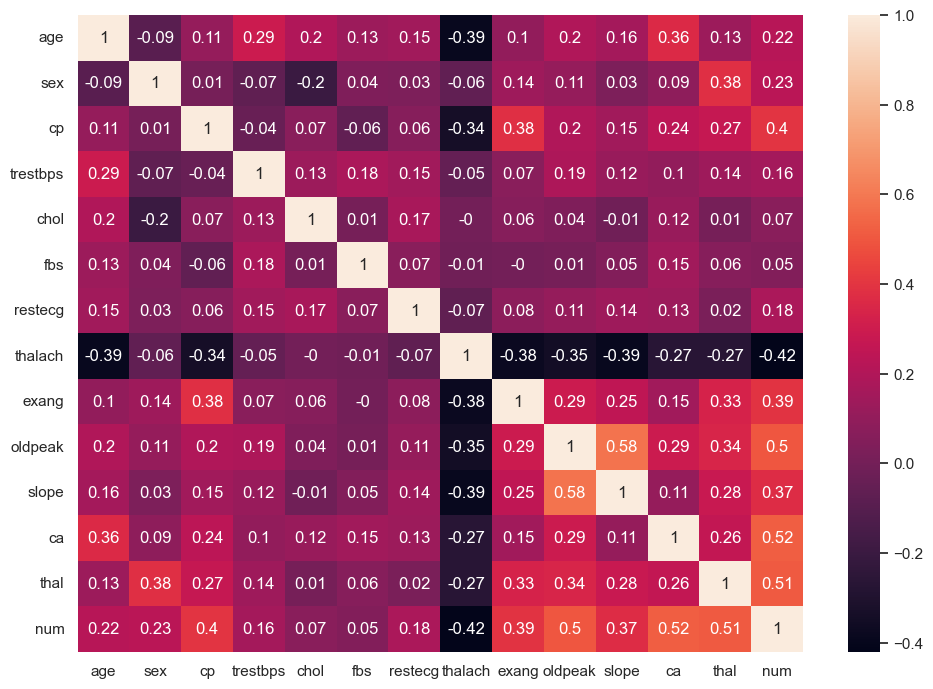

ca has the highest relation with the result


In [3]:
#Exercise 5_1
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

df = pd.read_csv('processed.cleveland.data', na_values='?', names=columns)



#cleaning data
df.isnull().sum()

df = df.dropna()

correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data=correlation_matrix, xticklabels=columns, yticklabels=columns, annot=True)
plt.show()

print("ca has the highest relation with the result")

### Exercise 5.2:

In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

df = pd.read_csv('processed.cleveland.data', na_values='?', names=columns)



#cleaning data
df.isnull().sum()

df = df.dropna()

X = df.drop('num', axis=1)
Y = df['num']

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

logisticRegression = linear_model.LogisticRegression()
logisticRegression.fit(X_train_scaled, Y_train_1)
y_pred1 = logisticRegression.predict(X_test_scaled)

linearRegression = linear_model.LinearRegression()
linearRegression.fit(X_train_scaled, Y_train_1)
y_pred2 = linearRegression.predict(X_test_scaled)

logistic_mse = mean_squared_error(Y_test_1, y_pred1)
linear_mse = mean_squared_error(Y_test_1, y_pred2)

logistic_r2 = r2_score(Y_test_1, y_pred1)
linear_r2 = r2_score(Y_test_1, y_pred2)

print("Logistic Regression MSE:", logistic_mse)
print("Linear Regression MSE:", linear_mse)
print("\nLogistic Regression R-squared:", logistic_r2)
print("Linear Regression R-squared:", linear_r2)

Logistic Regression MSE: 1.1666666666666667
Linear Regression MSE: 0.6993788213056163

Logistic Regression R-squared: 0.18604651162790697
Linear Regression R-squared: 0.5120612874611978


### Exercise 6

Download the Excel file “Sample-probability-distributions-graph.xlsx” of the sample distributions from the lecture notes. By visual observation and running the regression analysis (for example by Excel regression analysis) find out which probability distribution is linear. You can examine fitting the distribution data by using linear regression model or by explaining the equation of each distribution.

In [1]:
print("Binomail probability distribution had the linear regression")
print("Geometric probability distribution had the linear regression")
print("Poisson probability distribution had the linear regression")
print("Exponential probability distribution had the linear regression")
print("Noraml probability distribution had the linear regression")
print("Pareto probability distribution had the linear regression")

Binomail probability distribution had the linear regression
Geometric probability distribution had the linear regression
Poisson probability distribution had the linear regression
Exponential probability distribution had the linear regression
Noraml probability distribution had the linear regression
Pareto probability distribution had the linear regression
